## Wykład 3 - Jak działa GPT

Wykorzystanie kart graficznych do obliczeń

* Wykorzystanie GPU przyśpiesza obliczenia (szczególnie mnożenie dużych macierzy)
* Przesyłanie danych na GPU zajmuje czas
* Mamy ograniczoną pamięć na GPU

In [1]:
import torch

In [2]:
# sprawdzamy, czy mamy dostęp do karty graficznej
# Colab - przetestować przed i po włączeniu
torch.cuda.is_available()

True

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
tensor = torch.randn(3, 3)
tensor

tensor([[-0.6150,  0.8479,  1.3576],
        [ 0.6067, -0.4459,  0.7299],
        [-1.2384, -1.8003,  0.1220]])

In [6]:
tensor.device

device(type='cpu')

In [7]:
tensor_gpu = tensor.to(device)
tensor_gpu

tensor([[-0.6150,  0.8479,  1.3576],
        [ 0.6067, -0.4459,  0.7299],
        [-1.2384, -1.8003,  0.1220]], device='cuda:0')

In [8]:
tensor_gpu

tensor([[-0.6150,  0.8479,  1.3576],
        [ 0.6067, -0.4459,  0.7299],
        [-1.2384, -1.8003,  0.1220]], device='cuda:0')

In [10]:
# nie możemy wykonywać obliczeń na tensorach które są na różnych jednostkach obliczeniowych
tensor @ tensor_gpu

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)

#### Czas obliczeń

In [11]:
tensor = torch.randn(1000, 1000)
tensor_gpu = tensor.to("cuda")

In [14]:
%%timeit 
result_cpu = tensor @ tensor

7.24 ms ± 243 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
# obliczenia na gpu mogą być asynchroniczne, więć wywołujemy synchronize, że sprawdzić faktyczny czas
%%timeit 
result_gpu = tensor_gpu @ tensor_gpu
torch.cuda.synchronize()

638 μs ± 77.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


* Ogólnie będziemy od kolejnych zajęć przechowywać dane i modele (parametry) oraz prowadzić obliczenia na gpu
* Czasem potrzebujemy coś przesłać z powrotem na cpu (np. żeby przekonwertować do numpy albo zrobić wykres)

In [17]:
# konwersja na numpy
tensor_np = tensor.cpu().numpy()

In [18]:
import torch
import matplotlib.pyplot as plt

In [19]:
# dane na gpu
x = torch.linspace(0, 10, 100, device="cuda")
y = torch.sin(x) # y też jest na gpu bo został utworzony z x-a na gpu

In [20]:
y.device

device(type='cuda', index=0)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

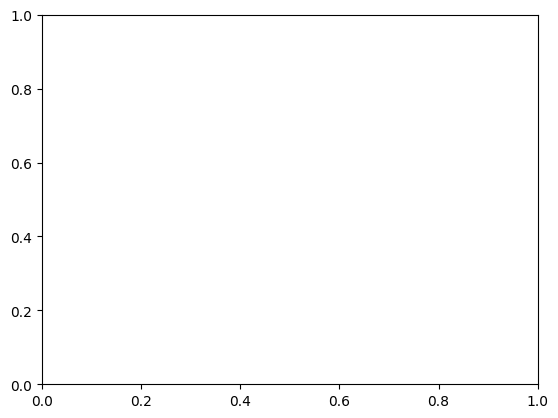

In [23]:
# do wykresu wymagana jest konwersja na numpy i wcześniejsze przeniesienie na cpu
plt.plot(x, y)

In [25]:
x_cpu = x.cpu().numpy()
y_cpu = y.cpu().numpy()

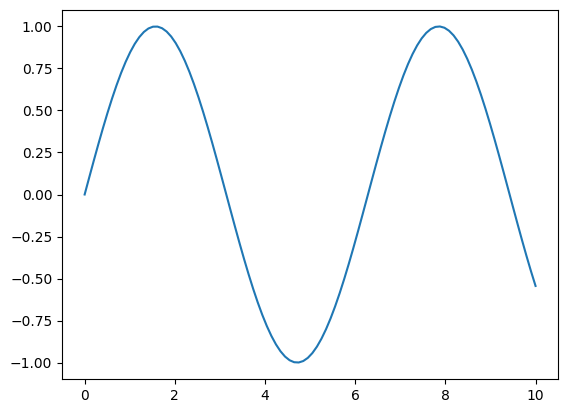

In [27]:
plt.plot(x_cpu, y_cpu);